In [ ]:
import json

with open("detection_results.json") as f:
    results = json.load(f)

# Set of creator handles
creator_set = set([
    "_.dracarys.x_",
    "_.harshitha_.gowda._",
    "_.heartwants._",
    "_.hett",
    "_.keshavi._",
    "_.kirranchauhan._",
    "_.life_in_pastel._",
    "_.manisha_kulal",
    "_.mile.y",
    "_.minney__06",
    "_.miss_komal_.1026",
    "_.nickyy75_",
    "_.nutrihealth",
    "_.palakvasudeva._",
    "_.phenomenail",
    "_.poojjja._",
    "_.priyanshiii01",
    "_.ranideepa._",
    "_.samridhii_",
    "_.shikhachaudhary._",
    "_.shobhomita",
    "_.shrush_",
    "_.srilakshmi.__",
    "_.sudeshnax.__",
    "_.tanisha._.22._",
    "_.vandana._03",
    "_3.4ooo",
    "__.aaddyyyyyyyy",
    "__.aishi_",
    "__.ambiverttt",
    "__.anuraaag",
    "__.mitara.b.__",
    "__.prachi.__26",
    "__.sannss",
    "__.shammu_zz",
    "__.soulzy",
    "__.tashaa.__",
    "___.ishpreet",
    "____.jagriti.___",
    "______jasmine1_______",
    "_____keppy_____",
    "_____tequila_girl",
    "____sanjana___boro____",
    "____vartikaa___",
    "___aamu___05",
    "___antara__ghosh___",
    "___chinmoy_bora",
    "___dhanu07___",
    "___dubey___ji___",
    "___jasmine_05",
    "___jelly_bean___",
    "___kamakshiiiiii",
    "___malemnganbiii___",
    "___maxumilian___",
    "___mikku___",
    "___nikhat____",
    "___notyourcupoftea___",
    "___riyuhhh___",
    "___sadah____",
    "___simran__official___",
    "___srn_9779_",
    "___tannu20",
    "___tripathi__",
    "___twinkling___",
    "___whatarethose",
    "__akshitagupta",
    "__ankitaa._____",
    "__apurvapawar_",
    "__ar_yaaa__",
    "__barbie_grl",
    "__baruah__96",
    "__beauty__squad__",
    "__bellabeautyy",
    "__bhumi_thakur___",
    "__bint.abdullah__",
    "__brownie_love__",
    "__chachiii_",
    "__chikka",
    "__clematiss__",
    "__darshan____0024",
    "__devlina__",
    "__dr__.aastha___.yadav",
    "__embxx",
    "__estrellaaaa.__",
    "__hussainujjain",
    "__iamleeba._",
    "__ishannnnn._",
    "__ishikasachdeva__",
    "__ishsh__",
    "__jenny_pereira__",
    "__jess_mavalia__",
    "__jessferns__43",
    "__kajal.bisht__",
    "__kalitapriyamr__",
    "__kaur___simran",
    "__khushiiiii__3",
    "__kripali",
    "__lil.jannat",
    "__lucy.2.0__",
    "__ma.dh.u___"
])

dsfd_fns = set()
yolov8_fns = set()

for entry in results:
    handle = entry["handle"]
    if handle in creator_set:
        if entry["dsfd"] == 0:
            dsfd_fns.add(handle)
        if entry["yolov8"] == 0:
            yolov8_fns.add(handle)

print(f"dsfd false negatives: {len(dsfd_fns)}")
print(f"yolo false negatives: {len(yolov8_fns)}")
print(f"missed by both: {len(dsfd_fns & yolov8_fns)} => {dsfd_fns & yolov8_fns}")
print(f"caught by yolo, missed by dsfd: {len(dsfd_fns - yolov8_fns)} => {dsfd_fns - yolov8_fns}")
print(f"missed by yolo, caught by dsfd: {len(yolov8_fns - dsfd_fns)} => {yolov8_fns - dsfd_fns}")

dsfd false negatives: 18
yolo false negatives: 12
missed by both: 12 → {'_.manisha_kulal', '___mikku___', '__iamleeba._', '_.heartwants._', '_____tequila_girl', '_.life_in_pastel._', '____sanjana___boro____', '__jess_mavalia__', '_.shikhachaudhary._', '__lil.jannat', '_.vandana._03', '___sadah____'}
caught by yolo, missed by dsfd: 6 → {'__barbie_grl', '___notyourcupoftea___', '___dhanu07___', '___simran__official___', '__lucy.2.0__', '__kalitapriyamr__'}
missed by yolo, caught by dsfd: 0 → set()


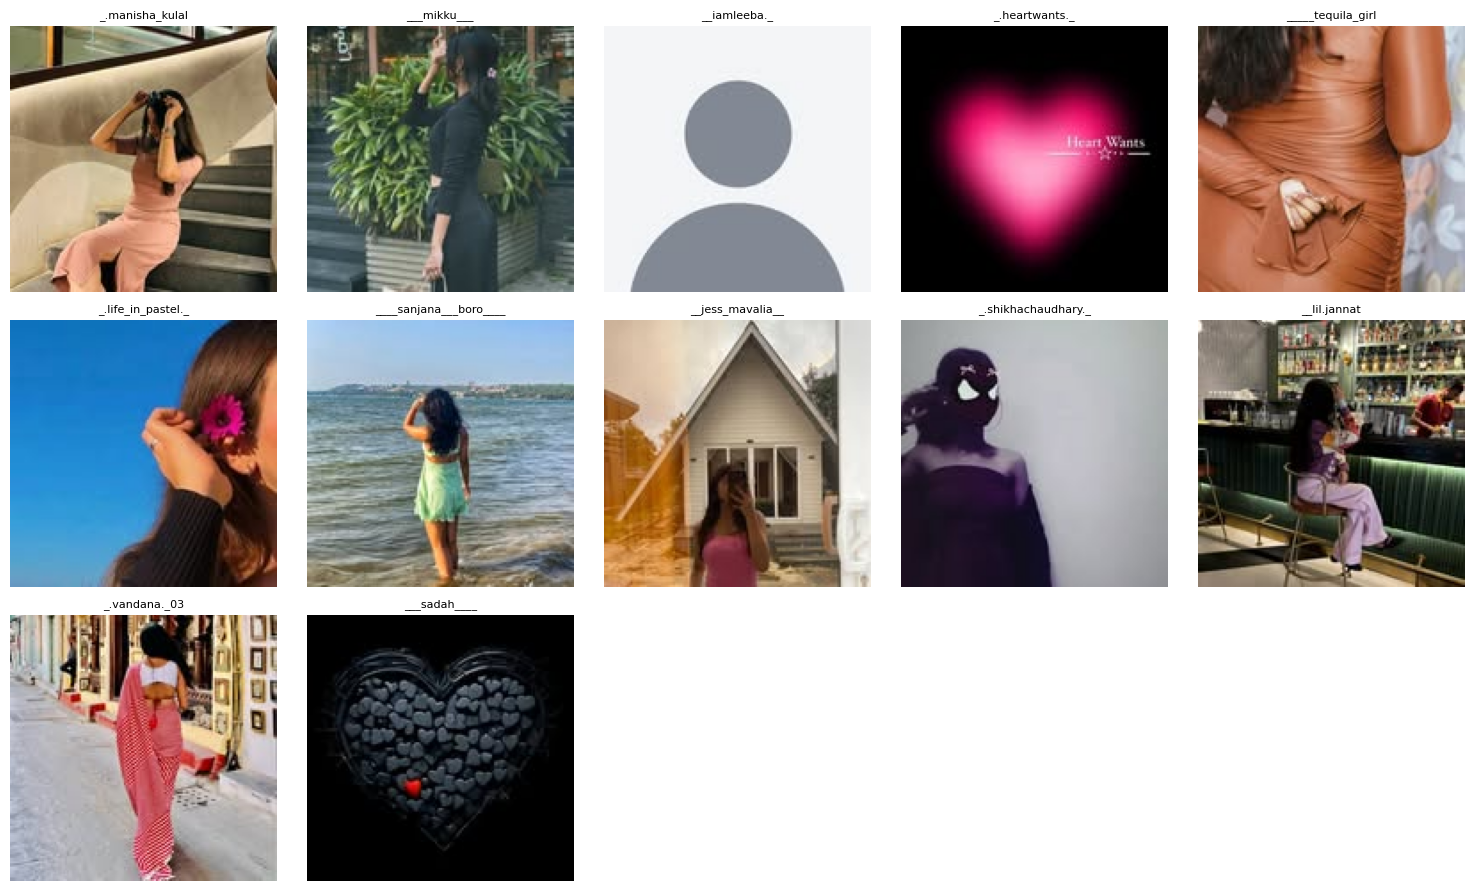

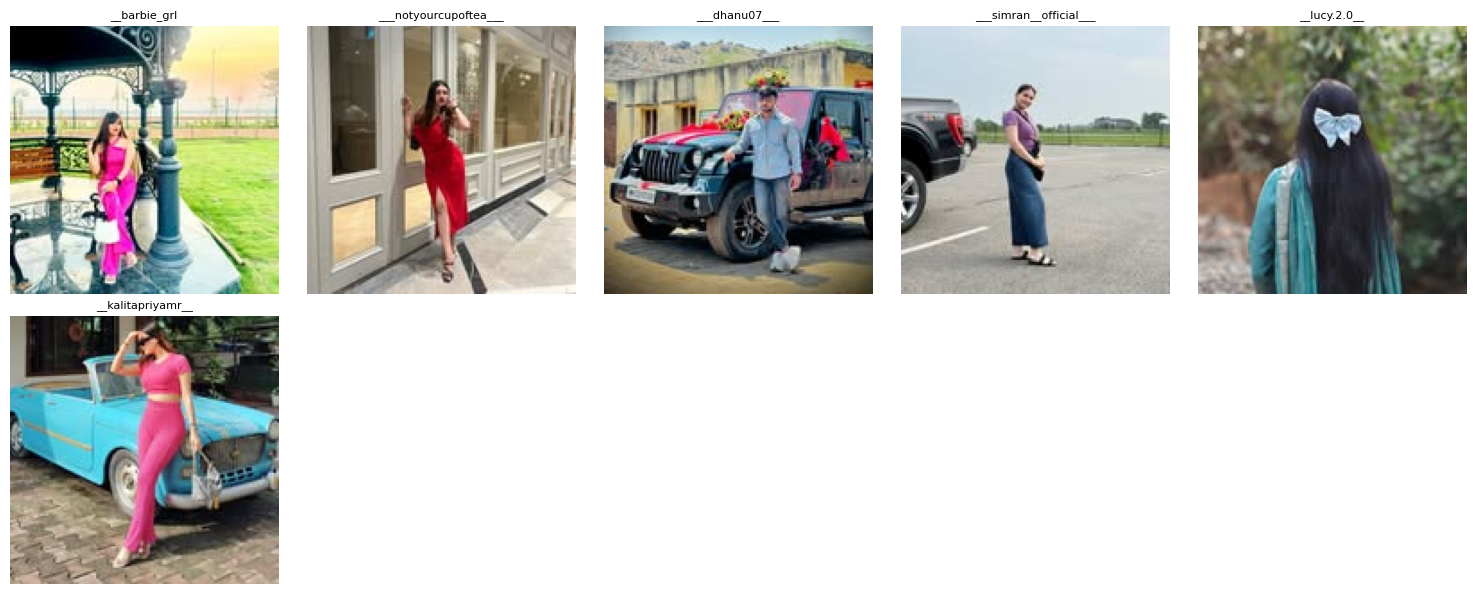

<Figure size 1500x0 with 0 Axes>

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

DATA_ROOT = "/home/yash-sisodia/face-detection/collaborators"

def show_images(handles):
    cols = 5
    rows = (len(handles) + cols - 1) // cols
    plt.figure(figsize=(15, rows * 3))

    for i, handle in enumerate(handles):
        img_path = os.path.join(DATA_ROOT, handle, "profile.jpg")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.title(handle, fontsize=8)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

show_images(dsfd_fns & yolov8_fns)
show_images(dsfd_fns - yolov8_fns)
show_images(yolov8_fns - dsfd_fns)